In [33]:
from sklearn import linear_model
import numpy as np

reg = linear_model.LogisticRegression(max_iter=1000)
np.set_printoptions(suppress=True)

In [34]:
def split_set(D):
    X_D = []
    y = []
    for elem in D:
        X_D.append([1] + list(elem[0]))
        y.append(elem[1])
    return np.array(X_D), np.array(y)

## Frage 1

In [35]:
𝐷={((16,22),1),((43,70),1),((135,50),0),((42,46),0),((60,59),0),((105,140),1)}
X, y = split_set(D)
reg.fit(X, y)
print(reg.intercept_)
print(reg.coef_)

[1.75850742]
[[ 0.00000455 -0.586275    0.45263316]]


## Frage 2

In [42]:
from sklearn.preprocessing import PolynomialFeatures

𝐷={((12,11),0),((13,14),1),((11,8),1),((6,2),0),((12,10),0),((7,11),0)}
X, y = split_set(D)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X[:,1:])
reg.fit(X_poly, y)
print(str(np.round(reg.intercept_, 3)).replace(".", ","))
print(str(np.round(reg.coef_[0][1:], 3)).replace(".", ","))

[-11,265]
[ 0,064 -0,202  0,386 -0,635  0,33 ]


## Frage 3

Class 1
12,041
[-0,62  -0,188]
Class 2
-4,729
[0,26  0,083]
Class 3
-7,311
[0,36  0,105]


<Figure size 640x480 with 0 Axes>

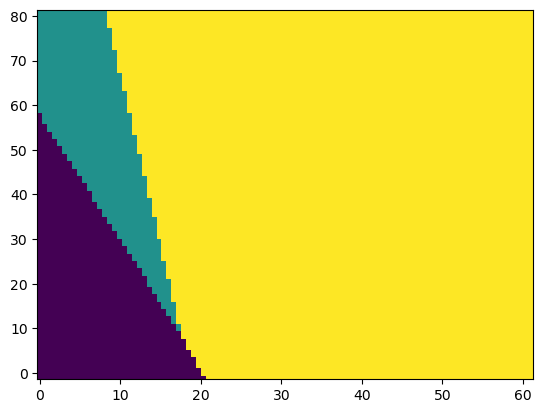

In [75]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
D = {((1,80),2),((20,3),2),((5,0),1),((13,12),1),((60,30),3),((10,40),3)}
X, y = split_set(D)
clf = linear_model.LogisticRegression(multi_class='ovr').fit(X[:,1:],y)
plt.figure()

DecisionBoundaryDisplay.from_estimator(clf,X[:,1:],plot_method="pcolormesh")
for i in range(3):
    print("Class " + str(i+1))
    print(str(np.round(reg.intercept_[i], 3)).replace(".", ","))
    print(str(np.round(reg.coef_[i][1:], 3)).replace(".", ","))

## Frage 4

In [167]:
D={((0.3,0.3),1),((0.24,0.26),4),((0.33,0.2),2),((0.35,0.4),3),((0.39,0.38),3),((0.42,0.26),1)}
X, y = split_set(D)

X_poly = poly.fit_transform(X[:,1:])
reg = linear_model.LogisticRegression(max_iter=1000)
clf = reg.fit(X_poly, y)

X_poly = np.round(X_poly[:,1:],3)
X_poly_print = ["(" + str(list(x)) + "," + str(y[i]) + ")" for i, x in enumerate(X_poly)]
print(str(X_poly_print).replace("'","").replace("[", "(").replace("]", ")"))

for i, c in enumerate(clf.classes_):
    print("Klasse: " + str(c))
    print("D_" + str(c) + "=" )
    print("Theta_" + str(c) + "=(" + str(np.round(reg.intercept_[i],3)) + "," + str(list(np.round(reg.coef_[i][1:],3))).replace("[","").replace(" ", "").replace("]", ")"))
    print()


(((0.42, 0.26, 0.176, 0.109, 0.068),1), ((0.39, 0.38, 0.152, 0.148, 0.144),3), ((0.35, 0.4, 0.122, 0.14, 0.16),3), ((0.3, 0.3, 0.09, 0.09, 0.09),1), ((0.33, 0.2, 0.109, 0.066, 0.04),2), ((0.24, 0.26, 0.058, 0.062, 0.068),4))
Klasse: 1
D_1=
Theta_1=(0.344,0.043,-0.039,0.03,-0.006,-0.032)

Klasse: 2
D_2=
Theta_2=(-0.304,-0.008,-0.099,-0.009,-0.036,-0.054)

Klasse: 3
D_3=
Theta_3=(0.248,0.062,0.177,0.038,0.082,0.113)

Klasse: 4
D_4=
Theta_4=(-0.288,-0.097,-0.039,-0.06,-0.04,-0.027)

